![trader](trader.jpg)


Asset allocation is the most important decision that any investor needs to face. They need to decide how to spread their total capital over certain assets (in this case, stocks). When considering the allocation, the investor wants to balance the risk and the potential reward. At the same time, the allocation depends on factors such as individual goals, risk tolerance, and the investment horizon.

The key framework used in asset allocation is the Modern Portfolio Theory (MPT), which was introduced by the Nobel Prize winner Harry Markowitz. MPT describes how investors can construct portfolios to maximize their expected returns for a given level of risk or, conversely, minimize risk for a given level of expected return. The mathematical framework used to achieve this is called mean-variance optimization.

The main insight from MPT is that investors should not evaluate an asset’s performance alone. Instead, they should evaluate how it would impact the performance of a portfolio of assets. Another important takeaway is the concept of diversification, which means that owning different kinds of assets reduces risk. That is because the loss or gain of a particular security has less impact on the overall portfolio’s performance.

**Your task**

In the dynamic realm of finance, data scientists/analysts are often tasked with finding optimal investment strategies. Imagine you're one such analyst, and you were asked to build an effective portfolio comprising FAANG stocks – Facebook (Meta), Apple, Amazon, Netflix, and Google. Your goal is to maximize returns while mitigating risk.

In this project, you are tasked to find the optimal allocation to the FAANG stocks based on historical stock price data spanning the years 2020-2023. The dataset is stored in the `faang_stocks.csv` file. For each trading day, it contains the close prices of the five tech companies.


In [53]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

# Setting the plotting style to be colorblind-friendly
plt.style.use("seaborn-colorblind")

# Loading data
stock_prices_df = pd.read_csv("faang_stocks.csv", index_col="Date")

# Changing the index to a datetime type allows for easier filtering and plotting.
stock_prices_df.index = pd.to_datetime(stock_prices_df.index)
stock_prices_df

,AAPL,AMZN,GOOGL,META,NFLX
Date,,,,,
2020-01-02,75.09,94.90,68.43,209.78,329.81
2020-01-03,74.36,93.75,68.08,208.67,325.90
2020-01-06,74.95,95.14,69.89,212.60,335.83
2020-01-07,74.60,95.34,69.76,213.06,330.75
2020-01-08,75.80,94.60,70.25,215.22,339.26
...,...,...,...,...,...
2023-12-22,193.60,153.42,141.49,353.39,486.76
2023-12-26,193.05,153.41,141.52,354.83,491.19
2023-12-27,193.15,153.34,140.37,357.83,491.79


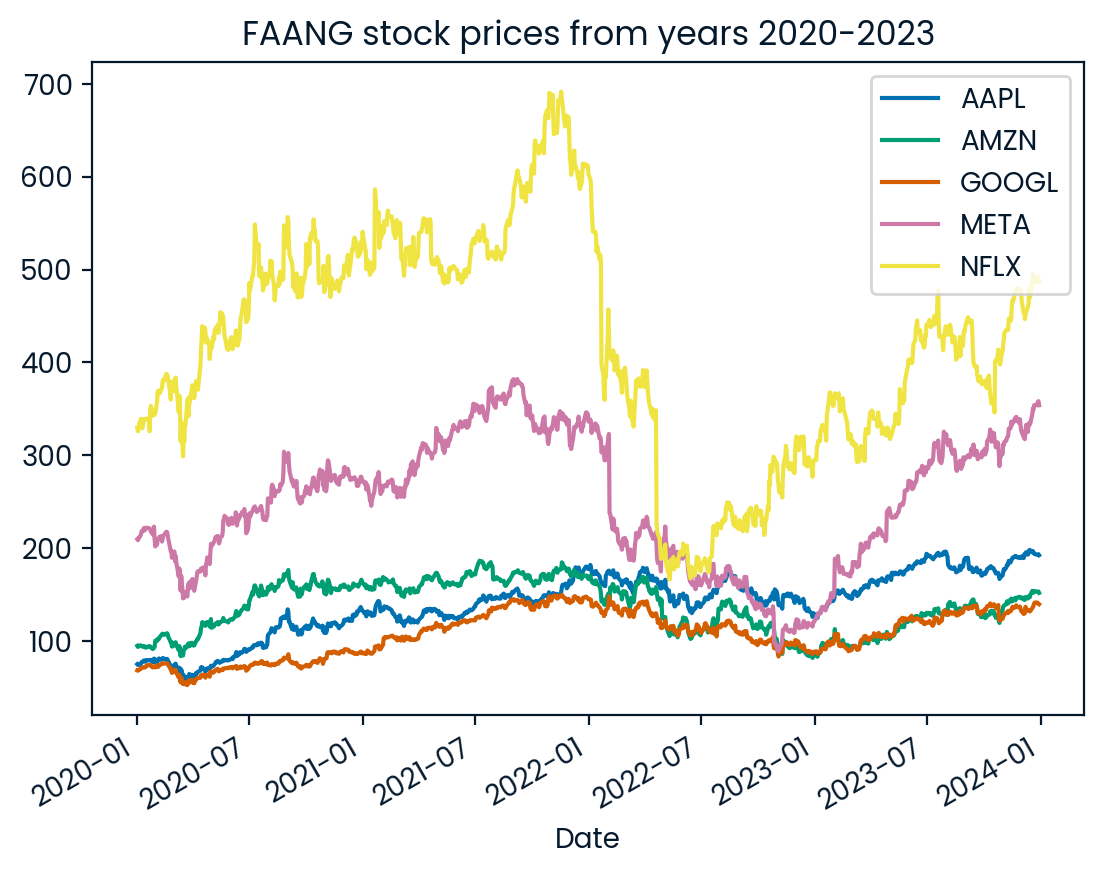

In [54]:
# Plotting the stock prices
stock_prices_df.plot(title="FAANG stock prices from years 2020-2023");

In [55]:
benchmark_exo_return = stock_prices_df.pct_change().dropna()
portfolio_weights = 5 * [0.2]
portfolio_returns = benchmark_exo_return.dot(portfolio_weights)
benchmark_exp_return = portfolio_returns.mean()

array([<AxesSubplot: xlabel='Date'>, <AxesSubplot: xlabel='Date'>,
       <AxesSubplot: xlabel='Date'>, <AxesSubplot: xlabel='Date'>,
       <AxesSubplot: xlabel='Date'>], dtype=object)

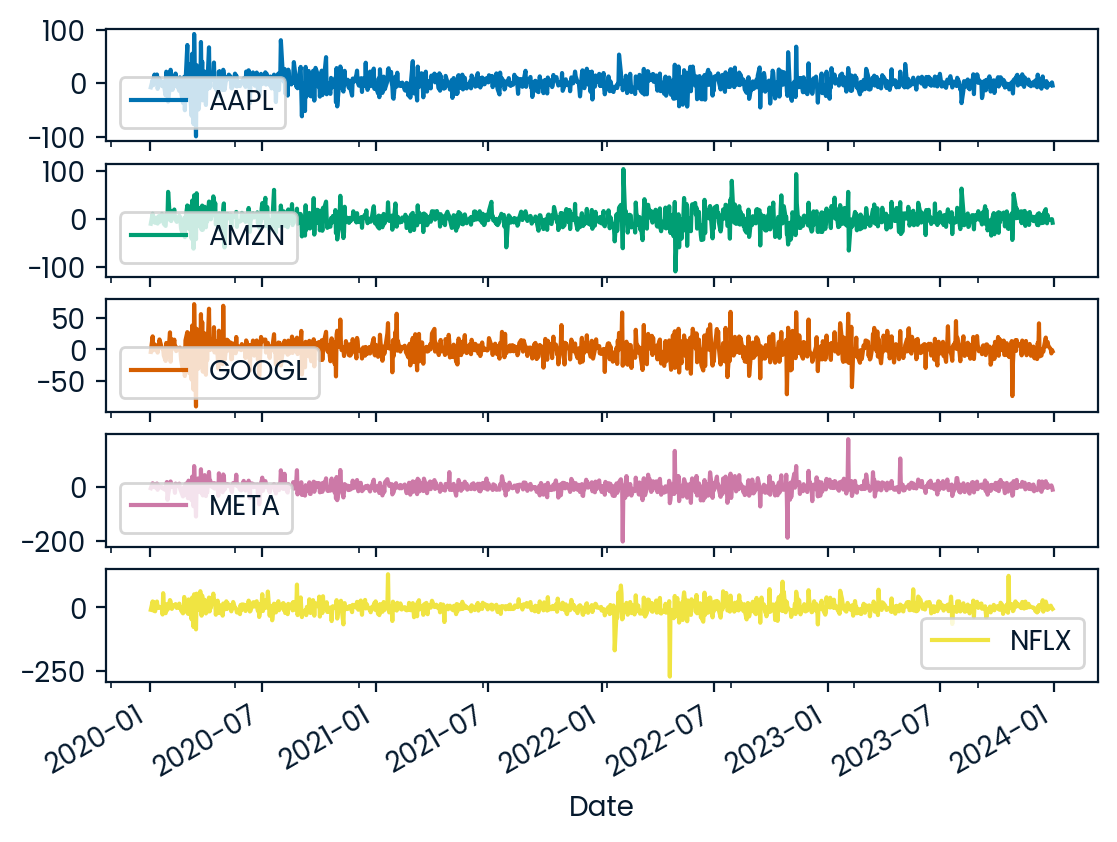

In [63]:
# Calculate the Sharpe ratio
benchmark_sharpe_ratio = (benchmark_exo_return / portfolio_returns.std() * np.sqrt(252))
benchmark_sharpe_ratio.plot(subplots=True)

In [61]:
avg_returns = benchmark_exo_return.mean() * 252
cov_mat = benchmark_exo_return.cov() * 252
ef = EfficientFrontier(avg_returns, cov_mat)

In [58]:
# Find weights that maximize the Sharpe ratio 
weights = ef.min_volatility()
mv_portfolio = pd.Series(weights)

# Find the minimized volatility
mv_portfolio_vol = ef.portfolio_performance(risk_free_rate=0)[1]

In [59]:
# Find the weights that maximize the Sharpe ratio
ef_sharpe = EfficientFrontier(avg_returns, cov_mat)
weights_sharpe = ef_sharpe.max_sharpe(risk_free_rate=0)
ms_portfolio_sharpe = pd.Series(weights_sharpe)

# Find the maximized Sharpe ratio
ms_portfolio_sharpe = ef_sharpe.portfolio_performance(risk_free_rate=0)[2]